# Hybrid Control Car


# 1 Setup

In [9]:
import hybrid_control_car as hcc
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

hz = 100 # Simulation steps per second
dt = 0.01 # Seconds per simulation timestep
meters_to_units = 100 # 1 unit = 1 cm
nstates = 6 # Number of states in the system

In [10]:
def plot_response(time, states, inputs):
    x = states[:, 0]
    z = states[:, 1]
    nx = states[:, 2]
    nz = states[:, 3]
    v = states[:, 4]
    w = states[:, 5]

    Fe = inputs[:, 0]
    theta = inputs[:, 1]

    fig, axs = plt.subplots(3, 2, sharex=True, figsize = (12, 12))
    axs = axs.flatten()

    axs[0].plot(time, x, label='$x$')
    axs[0].plot(time, z, label='$z$')
    axs[0].set_title("Position vs. Time")
    axs[0].set_ylabel("position (m)")
    axs[0].legend()

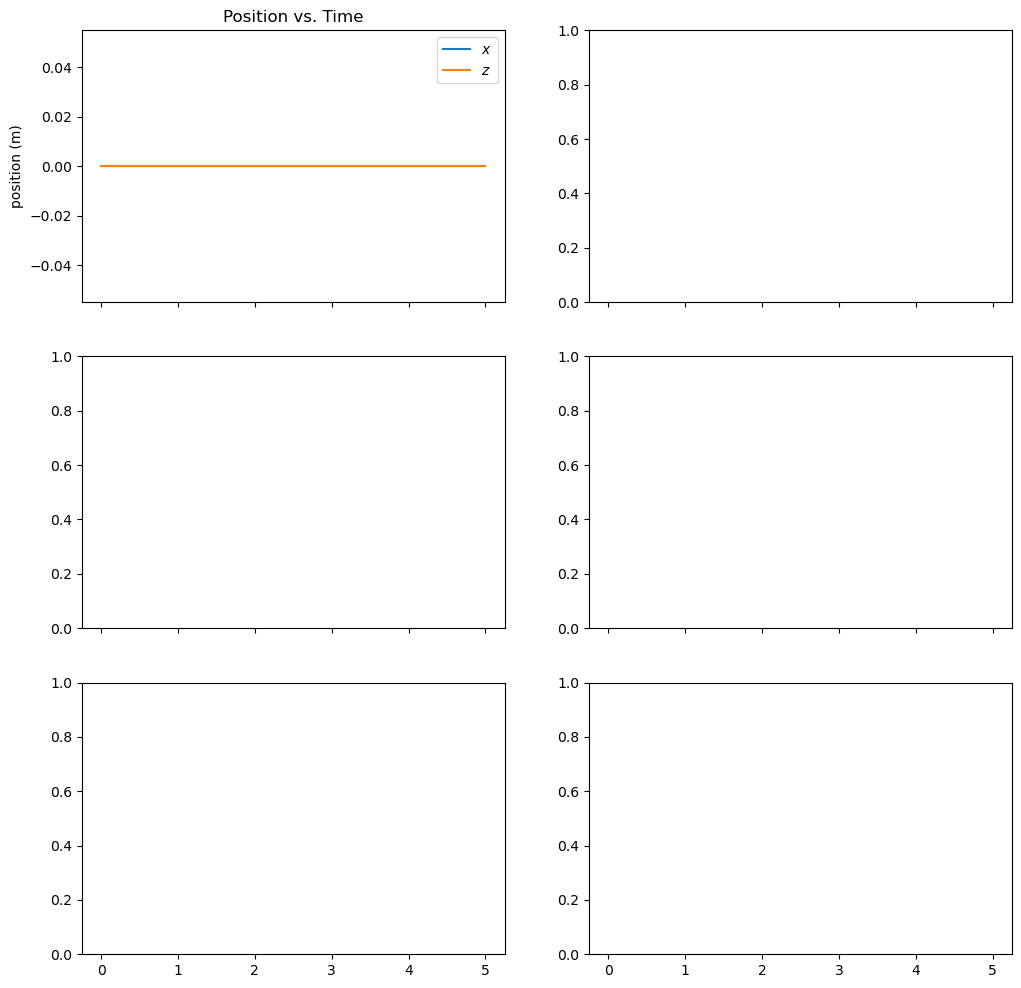

In [11]:
nsteps_test = 5*hz

test_inputs = np.vstack((
    1.0*np.ones(nsteps_test),
    np.zeros(nsteps_test)
)).T
test_states = np.zeros((nsteps_test, nstates))
x0 = np.array([0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

for t in range(nsteps_test):
    u = test_inputs[t, :]
    u[0] = u[0]*1000
    x = hcc.simulate(x0, u)
    test_states[t, :] = x0
    x0 = x

plot_response(np.linspace(0, 5, nsteps_test), test_states, test_inputs)
